In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np
import math
from scipy import signal
import soundfile as sf

In [2]:
sr = 44100
testFilterFreq = 5000

class TransferFunction(object):
    def __init__(self, inZeros, inPoles, k):
        self.zeros = inZeros
        self.poles = inPoles
        self.k = k
        self.vec_calc = np.vectorize(self.calc)
    
    def calc(self, x, y):
        z = complex(x, y)
        num = 1
        for zero in self.zeros:
            num *= z - zero
        dem = 1
        for pole in self.poles:
            dem *= z - pole
        return self.k * (num / dem)

def makeTransferFunction(inZeros, inPoles, k):
    return TransferFunction(inZeros, inPoles, k)

def plotZPlane(tf, maxMag, elev=15, angle=-45):
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(15, 15))

    ax.view_init(elev=elev, azim=angle)

    # Make data.
    X = np.arange(-1.5, 1.5, 0.02)
    Y = np.arange(-1.5, 1.5, 0.02)
    X, Y = np.meshgrid(X, Y)
    Z = np.clip(np.absolute(tf.vec_calc(X, Y)), 0, maxMag)

    # Plot the surface.
    surf = ax.plot_surface(X, Y, Z, cmap=cm.Spectral,
                       linewidth=0, antialiased=True, alpha=0.6)

    # Customize the z axis.
    ax.set_zlim(0, maxMag)
    ax.zaxis.set_major_locator(LinearLocator(10))
    # A StrMethodFormatter is used automatically
    ax.zaxis.set_major_formatter('{x:.02f}')
    ax.set_xlabel('Real')
    ax.set_ylabel('Imaginary')
    ax.set_zlabel('Magnitude')

    # Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=5)

    X = np.cos(np.arange(0, 2*math.pi, 0.06))
    Y = np.sin(np.arange(0, 2*math.pi, 0.06))
    Z = np.clip(np.absolute(tf.vec_calc(X, Y)), 0, maxMag)

    ax.plot(X, Y, Z, color='black', linewidth=2)
    
    Z = np.zeros(len(X))
    ax.plot(X, Y, Z, color='black')
    
    zeroPlotSize = 0.075
    for zero in tf.zeros:
        X = np.add(np.multiply(np.cos(np.arange(0, 2*math.pi, 0.06)), zeroPlotSize), zero.real)
        Y = np.add(np.multiply(np.sin(np.arange(0, 2*math.pi, 0.06)), zeroPlotSize), zero.imag)
        Z = np.zeros(len(X))
        ax.plot(X, Y, Z, color='black')

    for pole in tf.poles:
        X = np.array([pole.real - (zeroPlotSize/2), pole.real + (zeroPlotSize/2)])
        Y = np.array([pole.imag - (zeroPlotSize/2), pole.imag + (zeroPlotSize/2)])
        Z = np.zeros(len(X))
        ax.plot(X, Y, Z, color='r')
        X = np.array([pole.real + (zeroPlotSize/2), pole.real - (zeroPlotSize/2)])
        Y = np.array([pole.imag - (zeroPlotSize/2), pole.imag + (zeroPlotSize/2)])
        ax.plot(X, Y, Z, color='r')

    plt.show()

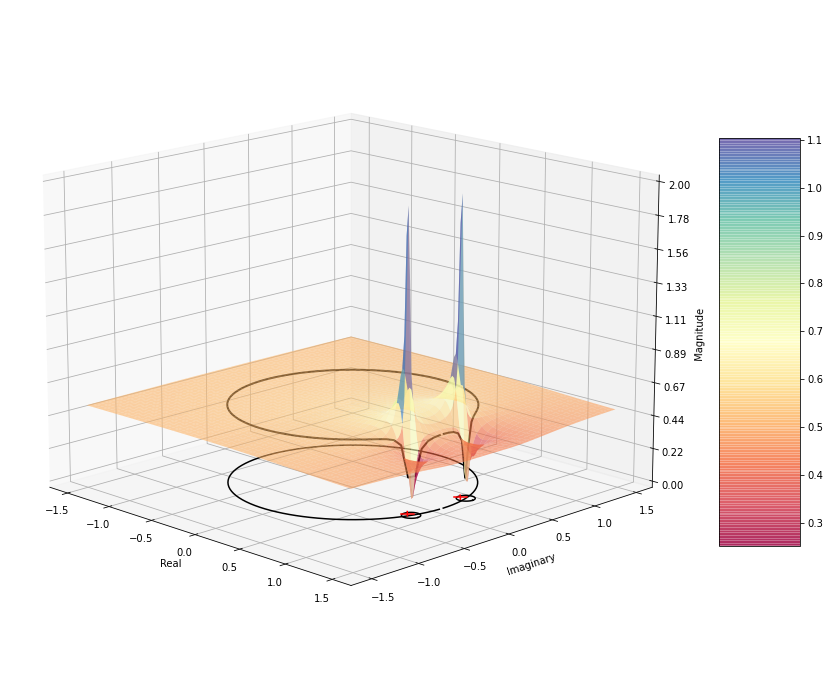

In [3]:
tf = makeTransferFunction([complex(0.95, 0.31), complex(0.95, -0.31)], 
                          [complex(0.9, 0.3), complex(0.9, -0.3)],
                          0.5)

plotZPlane(tf, 2)

(0.0, 1.0)

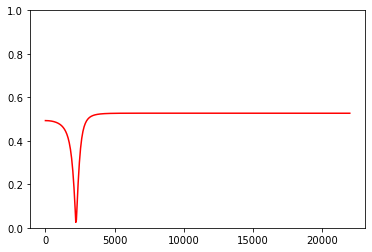

In [4]:
z = [complex(0.95, 0.31), complex(0.95, -0.31)]
p = [complex(0.9, 0.3), complex(0.9, -0.3)]
k = 0.5

w, h = signal.freqz_zpk(z, p, k, fs=sr)

fig, ax = plt.subplots()

ax.plot(w, np.absolute(h), color='r')
ax.set_ylim([0,1])



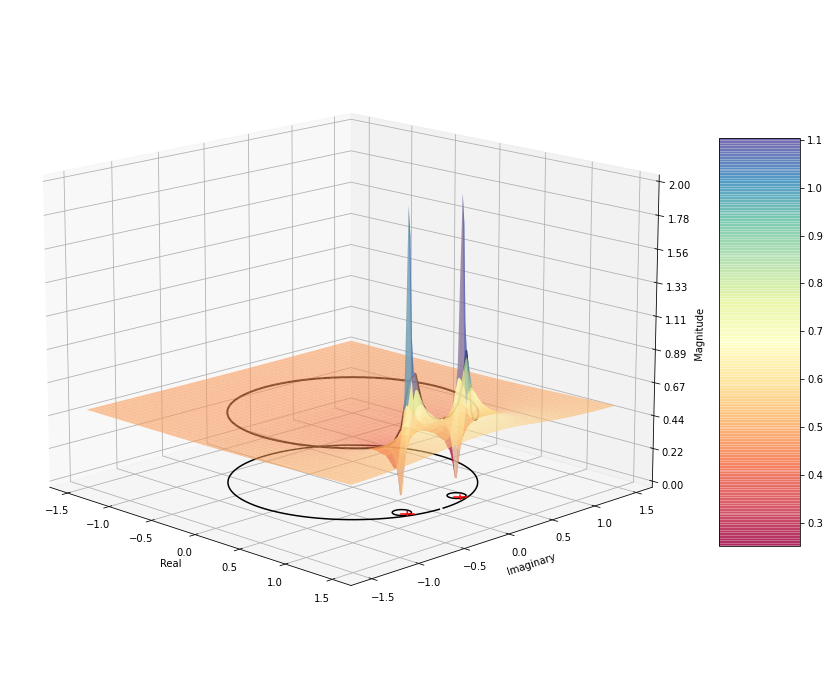

In [5]:
tf = makeTransferFunction([complex(0.85, 0.31), complex(0.85, -0.31)], 
                          [complex(0.9, 0.3), complex(0.9, -0.3)],
                          0.5)

plotZPlane(tf, 2)

(0.0, 1.0)

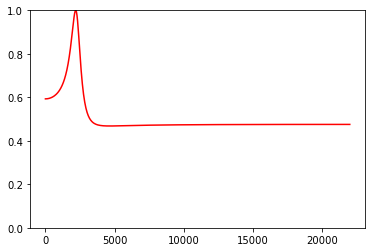

In [6]:
z = [complex(0.85, 0.31), complex(0.85, -0.31)]
p = [complex(0.9, 0.3), complex(0.9, -0.3)]
k = 0.5

w, h = signal.freqz_zpk(z, p, k, fs=sr)

fig, ax = plt.subplots()

ax.plot(w, np.absolute(h), color='r')
ax.set_ylim([0,1])


In [7]:
z, p, k = signal.butter(4, testFilterFreq, output='zpk', fs=sr)

print(z)
print(p)
print(k)

[-1. -1. -1. -1.]
[0.60538131+0.48305248j 0.47186091+0.15595655j 0.47186091-0.15595655j
 0.60538131-0.48305248j]
0.007374052586168694


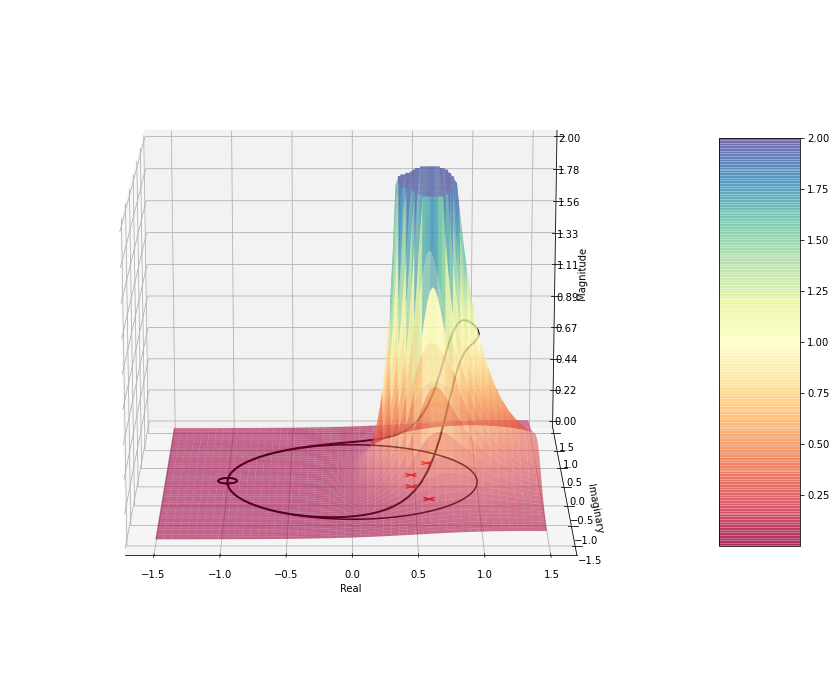

In [8]:
z, p, k = signal.butter(4, testFilterFreq, output='zpk', fs=sr)

tf = makeTransferFunction(z, p, k)
plotZPlane(tf, 2, angle=-90)

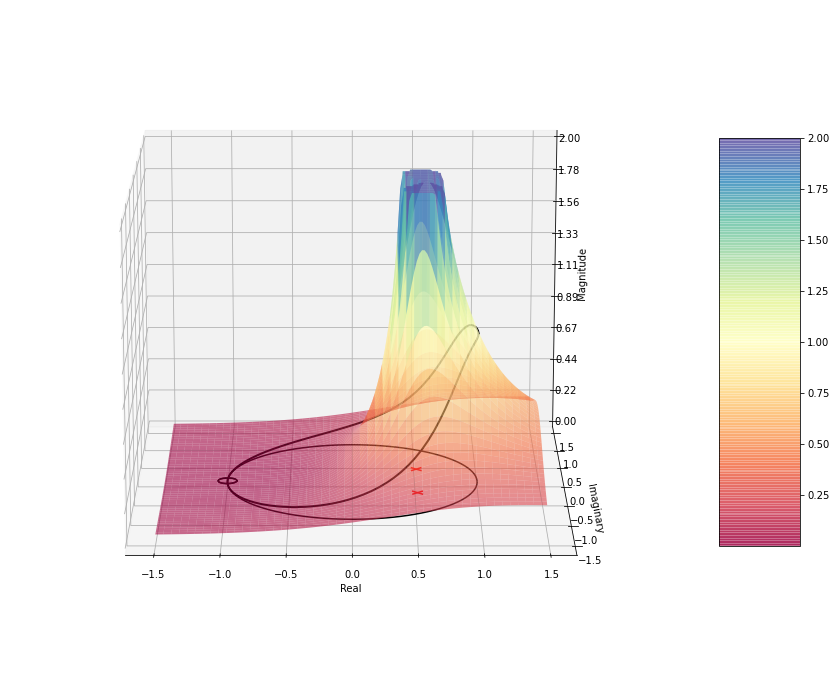

In [9]:
z, p, k = signal.butter(2, testFilterFreq, output='zpk', fs=sr)

tf = makeTransferFunction(z, p, k)
plotZPlane(tf, 2, angle=-90)

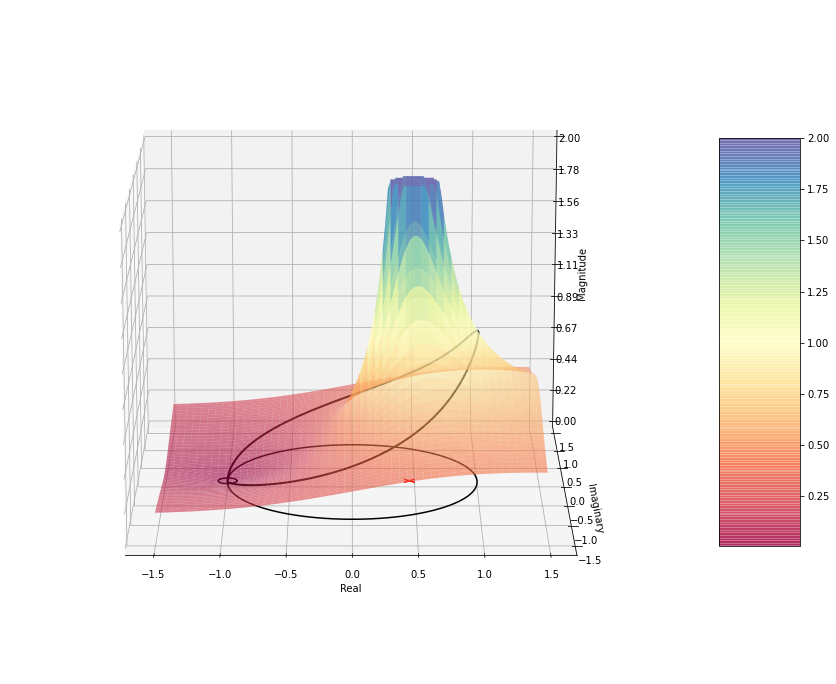

In [10]:
z, p, k = signal.butter(1, testFilterFreq, output='zpk', fs=sr)

tf = makeTransferFunction(z, p, k)
plotZPlane(tf, 2, angle=-90)

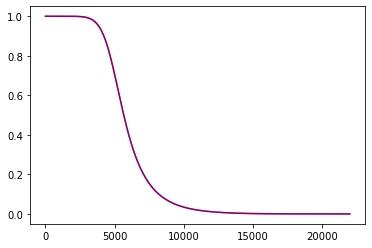

In [11]:
z, p, k = signal.butter(4, testFilterFreq, output='zpk', fs=sr)
w, h = signal.freqz_zpk(z, p, k, fs=sr)

fig, ax = plt.subplots()

ax.plot(w, np.absolute(h), color='r')

X = np.cos(np.arange(0, math.pi, math.pi/len(w)))
Y = np.sin(np.arange(0, math.pi, math.pi/len(w)))

tf1 = makeTransferFunction(z, p, k)
Z1 = np.absolute(tf1.vec_calc(X, Y))

ax.plot(w, Z1, color='b', alpha=0.5)


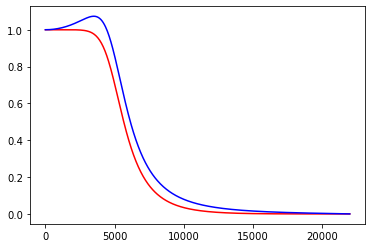

In [12]:
z, p, k = signal.butter(4, testFilterFreq, output='zpk', fs=sr)

fig, ax = plt.subplots()

X = np.cos(np.arange(0, math.pi, math.pi/len(w)))
Y = np.sin(np.arange(0, math.pi, math.pi/len(w)))

tf1 = makeTransferFunction(z, p, k)
Z1 = np.absolute(tf1.vec_calc(X, Y))

tf2 = makeTransferFunction([complex(-1,0)], p, k)
Z2 = np.multiply(np.absolute(tf2.vec_calc(X, Y)), 8)

ax.plot(w, Z1, color='r')
ax.plot(w, Z2, color='b')

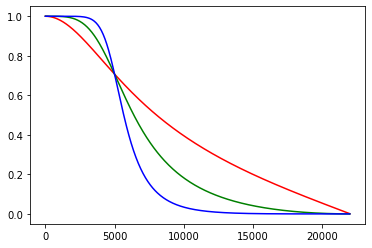

In [13]:
fig, ax = plt.subplots()

z1, p1, k1 = signal.butter(1, testFilterFreq, output='zpk', fs=sr)
w1, h1 = signal.freqz_zpk(z1, p1, k1, fs=sr)
ax.plot(w1, np.absolute(h1), color='r')

z2, p2, k2 = signal.butter(2, testFilterFreq, output='zpk', fs=sr)
w2, h2 = signal.freqz_zpk(z2, p2, k2, fs=sr)
ax.plot(w2, np.absolute(h2), color='g')

z4, p4, k4 = signal.butter(4, testFilterFreq, output='zpk', fs=sr)
w4, h4 = signal.freqz_zpk(z4, p4, k4, fs=sr)
ax.plot(w4, np.absolute(h4), color='b')


b: [   0.79631878   -7.96318778   35.83434502  -95.55825337  167.2269434
 -200.67233209  167.2269434   -95.55825337   35.83434502   -7.96318778
    0.79631878]
a: [   1.           -9.54462136   41.00487909 -104.41737082  174.53480697
 -200.09486144  159.34094444  -87.02835847   31.2004603    -6.6300023
    0.6341236 ]


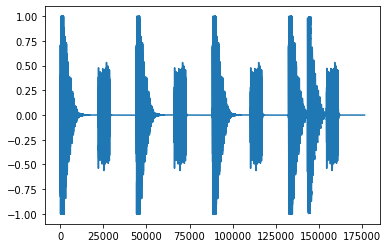

In [14]:
drumLoop, sr = sf.read('drumLoop.wav')
drumLoop = drumLoop[:,0] # Take Left channel
plt.plot(drumLoop)

b, a = signal.butter(10, 500, btype='highpass', output='ba', fs=sr)
print("b:", b)
print("a:", a)

left = signal.lfilter(b, a, drumLoop)

sf.write('output/drumLoop-hp1000.wav', left, sr)



In [15]:
drumLoop, sr = sf.read('drumLoop.wav')
drumLoop = drumLoop[:,0] # Take Left channel

filterOrder = 4
startFreq = 5000
endFreq = 10

sos = signal.butter(filterOrder, startFreq, btype='lowpass', output='sos', fs=sr)
zi = signal.sosfilt_zi(sos)

blockSize = 4096
numBlocks = int(len(drumLoop) / blockSize)

output = np.zeros(len(drumLoop) + blockSize)

for i in range(numBlocks):
    a = i / float(numBlocks)
    freq = startFreq + ((endFreq - startFreq) * a)

    blockStart = i * blockSize
    blockEnd = blockStart + blockSize
    
    sos = signal.butter(filterOrder, freq, btype='lowpass', output='sos', fs=sr)
    output[blockStart:blockEnd], zi = signal.sosfilt(sos, drumLoop[blockStart:blockEnd], zi=zi)
    
sf.write('output/drumLoop-movingLPFilter.wav', output, sr)

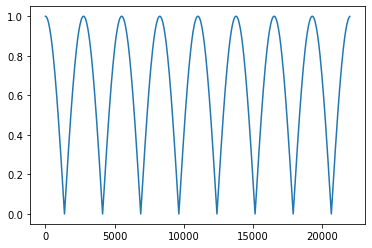

In [16]:
drumLoop, sr = sf.read('drumLoop.wav')
drumLoop = drumLoop[:,0] # Take Left channel

b = [0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5]
a = [1. ]

left = signal.lfilter(b, a, drumLoop)

sf.write('output/drumLoop-test.wav', left, sr)

w, h = signal.freqz(b, a, fs=sr)
plt.plot(w, np.absolute(h))